## Install dependencies

In [1]:
!pip install -q ultralytics roboflow
!pip install -q inference supervision
!pip install -q opencv-python
!pip uninstall -q -y sports
!pip install -q git+https://github.com/roboflow/sports.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 11.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Imports

In [2]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

In [3]:
from google.colab import files

uploaded = files.upload()   # <-- Cell này sẽ mở hộp thoại chọn file

uploaded

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tronggg","key":"3ff32a55d160f8b374cb172d93997169"}'}

In [4]:
import shutil
import os

os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Đặt quyền 600
os.chmod('/root/.kaggle/kaggle.json', 0o600)

print("✅ kaggle.json đã được config thành công!")

✅ kaggle.json đã được config thành công!


## Pull dataset

In [5]:
# Tải dataset private từ Kaggle
!kaggle datasets download -d tronggg/model-detect-player-final

# Giải nén vào thư mục model_detect
!unzip -o model-detect-player-final.zip -d model_detect

Dataset URL: https://www.kaggle.com/datasets/tronggg/model-detect-player-final
License(s): unknown
 93% 407M/437M [00:02<00:00, 100MB/s]
100% 437M/437M [00:02<00:00, 168MB/s]
Archive:  model-detect-player-final.zip
  inflating: model_detect/football-players-detection-12/README.dataset.txt  
  inflating: model_detect/football-players-detection-12/README.roboflow.txt  
  inflating: model_detect/football-players-detection-12/data.yaml  
  inflating: model_detect/football-players-detection-12/test/images/08fd33_3_6_png.rf.bee65249830b3e263ebe95a999f39e34.jpg  
  inflating: model_detect/football-players-detection-12/test/images/08fd33_9_3_png.rf.f5439a0d252bbf8a8ce96169744b49b6.jpg  
  inflating: model_detect/football-players-detection-12/test/images/40cd38_7_6_png.rf.dc7957fcce915bc48188f18a7b19455b.jpg  
  inflating: model_detect/football-players-detection-12/test/images/42ba34_1_5_png.rf.927d602c034ce2997f58f62a7c1245ba.jpg  
  inflating: model_detect/football-players-detection-12/test/i

In [6]:
# Tải dataset private từ Kaggle
!kaggle datasets download -d tronggg/model-detect-keypoint-final

# Giải nén vào thư mục model_detect
!unzip -o model-detect-keypoint-final.zip -d model_detect_keypoint

Dataset URL: https://www.kaggle.com/datasets/tronggg/model-detect-keypoint-final
License(s): unknown
 84% 306M/364M [00:00<00:00, 807MB/s] 
100% 364M/364M [00:00<00:00, 631MB/s]
Archive:  model-detect-keypoint-final.zip
  inflating: model_detect_keypoint/football-field-detection-5/README.dataset.txt  
  inflating: model_detect_keypoint/football-field-detection-5/README.roboflow.txt  
  inflating: model_detect_keypoint/football-field-detection-5/data.yaml  
  inflating: model_detect_keypoint/football-field-detection-5/test/images/00016_jpg.rf.1de2f1c47f1a028be25afcb4a9546a94.jpg  
  inflating: model_detect_keypoint/football-field-detection-5/test/images/00030_jpg.rf.35a548e4ac89ea44b9a613cab8f5ccee.jpg  
  inflating: model_detect_keypoint/football-field-detection-5/test/images/00058_jpg.rf.9fcc36ba3d0c55cea0d412bab04f1b4f.jpg  
  inflating: model_detect_keypoint/football-field-detection-5/test/images/00101_jpg.rf.0e94cdcd4a7a371011eb3361c2ac6de7.jpg  
  inflating: model_detect_keypoint/

## Deploy model on Roboflow

In [8]:
def get_center_of_bbox(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int((y1+y2)/2)

def get_bbox_width(bbox):
    return bbox[2]-bbox[0]

def measure_distance(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

def measure_xy_distance(p1,p2):
    return p1[0]-p2[0],p1[1]-p2[1]

def get_foot_position(bbox):
    x1,y1,x2,y2 = bbox
    return int((x1+x2)/2),int(y2)

In [9]:
import cv2

def read_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    return frames

def save_video(ouput_video_frames,output_video_path):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, 25, (ouput_video_frames[0].shape[1], ouput_video_frames[0].shape[0]))
    for frame in ouput_video_frames:
        out.write(frame)
    out.release()

In [10]:
import supervision as sv
import numpy as np
import cv2
from tqdm import tqdm

class Tracker:
    def __init__(self, PLAYER_DETECTION_MODEL):
        self.BALL_ID = 0
        self.GOALKEEPER_ID = 1
        self.PLAYER_ID = 2
        self.REFEREE_ID = 3
        self.PLAYER_DETECTION_MODEL = PLAYER_DETECTION_MODEL
        self.tracker = sv.ByteTrack(lost_track_buffer=120)
        self.tracker.reset()

    def get_detections_over_frames(self, detections):
        ball_detections = detections[detections.class_id == self.BALL_ID]
        ball_detections.class_id -= 1
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        all_detections = detections[detections.class_id != self.BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)

        all_detections = self.tracker.update_with_detections(detections=all_detections)

        goalkeepers_detections = all_detections[all_detections.class_id == self.GOALKEEPER_ID]
        players_detections = all_detections[all_detections.class_id == self.PLAYER_ID]
        referees_detections = all_detections[all_detections.class_id == self.REFEREE_ID]

        return all_detections, ball_detections, players_detections, goalkeepers_detections, referees_detections

    def track(self, SOURCE_VIDEO_PATH):
        tracks = {
            "players": [],
            "referees": [],
            "ball": [],
            "gks": []
        }

        frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

        for frame_num, frame in enumerate(tqdm(frame_generator, desc="Tracking")):
            result = self.PLAYER_DETECTION_MODEL.predict(frame, conf=0.3, device=0, verbose=False)[0]
            detections = sv.Detections.from_ultralytics(result)

            all_detections, ball_detections, players_detections, goalkeepers_detections, referees_detections = self.get_detections_over_frames(detections=detections)

            tracks["players"].append({})
            tracks["referees"].append({})
            tracks["ball"].append({})
            tracks["gks"].append({})

            # Lưu GK
            for frame_detection in goalkeepers_detections:
                bbox = frame_detection[0].tolist()
                track_id = frame_detection[4]
                tracks['gks'][frame_num][track_id] = {'bbox': bbox}

            # Lưu Referee
            for frame_detection in referees_detections:
                bbox = frame_detection[0].tolist()
                track_id = frame_detection[4]
                tracks['referees'][frame_num][track_id] = {'bbox': bbox}

            # Lưu Player
            for frame_detection in players_detections:
                bbox = frame_detection[0].tolist()
                track_id = frame_detection[4]
                tracks["players"][frame_num][track_id] = {"bbox": bbox}

            # Lưu Bóng
            for frame_detection in ball_detections:
                bbox = frame_detection[0].tolist()
                tracks['ball'][frame_num][1] = {"bbox": bbox}

        return tracks

    def draw_annotations(self, frames, tracks):
        output_frames = []
        frame_generator = sv.get_video_frames_generator(source_path=frames)

        ellipse_annotator = sv.EllipseAnnotator(thickness=2)

        for frame_num, frame in enumerate(tqdm(frame_generator, desc="Drawing")):
            frame = frame.copy()

            # Vẽ Player (Màu đỏ mặc định)
            for track_id, player in tracks['players'][frame_num].items():
                frame = self.draw_ellipse(frame, player['bbox'], (0, 0, 255), track_id)

            # Vẽ Referee (Màu vàng)
            for track_id, ref in tracks['referees'][frame_num].items():
                frame = self.draw_ellipse(frame, ref['bbox'], (0, 255, 255), track_id)

            # Vẽ Bóng (Màu xanh)
            for track_id, ball in tracks['ball'][frame_num].items():
                 frame = self.draw_triangle(frame, ball['bbox'], (255, 0, 0))

            output_frames.append(frame)

        return output_frames

    def draw_ellipse(self, frame, bbox, color, track_id=None):
        y2 = int(bbox[3])
        x1, y1, x2, _ = bbox
        x_center = int((x1 + x2) / 2)
        width = x2 - x1

        cv2.ellipse(frame, center=(x_center, y2),
                    axes=(int(width), int(0.35 * width)),
                    angle=0.0, startAngle=-45, endAngle=235,
                    color=color, thickness=2, lineType=cv2.LINE_4)

        if track_id is not None:
            # Vẽ số ID
            cv2.putText(frame, f"{track_id}", (int(x_center - 10), int(y2 + 15)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
        return frame

    def draw_triangle(self, frame, bbox, color):
        y = int(bbox[1])
        x1, y1, x2, y2 = bbox
        x_center = int((x1 + x2) / 2)
        triangles = np.array([[x_center, y], [x_center - 10, y - 20], [x_center + 10, y - 20]])
        cv2.drawContours(frame, [triangles], 0, color, cv2.FILLED)
        return frame

In [11]:
import numpy as np
import cv2

class View():
    def __init__(self):
        court_width = 68
        court_length = 23.32

        # self.pixel_vertices = np.array([[110, 1035],
        #                        [265, 275],
        #                        [910, 260],
        #                        [1640, 915]])

        self.pixel_vertices = np.array([
            [50, 1035],
            [200, 200],
            [1720, 200],
            [1870, 1035]
        ])

        self.target_vertices = np.array([
            [0,court_width],
            [0, 0],
            [court_length, 0],
            [court_length, court_width]
        ])

        self.pixel_vertices = self.pixel_vertices.astype(np.float32)
        self.target_vertices = self.target_vertices.astype(np.float32)

        self.persepctive_trasnformer = cv2.getPerspectiveTransform(self.pixel_vertices, self.target_vertices)

    def transform_point(self,point):
        p = (int(point[0]),int(point[1]))

        reshaped_point = point.reshape(-1,1,2).astype(np.float32)
        tranform_point = cv2.perspectiveTransform(reshaped_point,self.persepctive_trasnformer)
        return tranform_point.reshape(-1,2)

    def add_transformed_position_to_tracks(self,tracks):
        for object, object_tracks in tracks.items():
            for frame_num, track in enumerate(object_tracks):
                for track_id, track_info in track.items():
                    # print("track_info",track_info)
                    position = track_info['position_adjusted']
                    position = np.array(position)
                    position_trasnformed = self.transform_point(position)
                    if position_trasnformed is not None:
                        position_trasnformed = position_trasnformed.squeeze().tolist()
                    else:
                        position_trasnformed = position.tolist()
                    tracks[object][frame_num][track_id]['position_transformed'] = position_trasnformed
                # if frame_num == 100: break

In [12]:
from sports.annotators.soccer import draw_pitch, draw_points_on_pitch
from sports.configs.soccer import SoccerPitchConfiguration
from sports.common.view import ViewTransformer
import numpy as np
import supervision as sv
import cv2
from tqdm import tqdm

class Map_2:
    def __init__(self):
        self.CONFIG = SoccerPitchConfiguration()

    def draw_pitch(self):
        return draw_pitch(self.CONFIG)

    def get_anchor_coordinates_bottom_center(self, bbox_array):
        bbox_array = np.array(bbox_array)
        if bbox_array.size == 0:
            return np.empty((0, 2))
        return np.column_stack(((bbox_array[:, 0] + bbox_array[:, 2]) / 2, bbox_array[:, 3]))

    def draw_minimap(self, frames, tracks, FIELD_DETECTION_MODEL):
        output_map = []
        frame_generator = sv.get_video_frames_generator(source_path=frames)

        last_valid_pitch = draw_pitch(self.CONFIG)

        # --- CẤU HÌNH VẼ ---
        COLOR_PLAYER = sv.Color(r=255, g=0, b=0) # Đỏ
        COLOR_REF = sv.Color(r=0, g=255, b=255)  # Vàng
        COLOR_BALL = sv.Color(r=255, g=255, b=255) # Trắng

        # Font chữ ID
        TEXT_COLOR = (255, 255, 255) # Trắng
        TEXT_OUTLINE = (0, 0, 0)     # Đen
        FONT = cv2.FONT_HERSHEY_SIMPLEX

        PITCH_SCALE = 0.1
        PITCH_PADDING = 50


        for frame_num, frame in enumerate(tqdm(frame_generator, desc="Map Gen")):
            # 1. Tiền xử lý ảnh
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_input = cv2.cvtColor(frame_gray, cv2.COLOR_GRAY2BGR)

            # 2. Predict Sân
            try:
                result = FIELD_DETECTION_MODEL.infer(frame_input, confidence=0.5)[0]
                key_points = sv.KeyPoints.from_inference(result)
            except Exception:
                output_map.append(last_valid_pitch)
                continue

            # 3. Kiểm tra Keypoints
            if key_points.xy is None or key_points.xy.shape[1] == 0:
                output_map.append(last_valid_pitch)
                continue

            if key_points.confidence is not None:
                filter_mask = key_points.confidence[0] > 0.5
                frame_reference_points = key_points.xy[0][filter_mask]
                pitch_vertices = np.array(self.CONFIG.vertices)[filter_mask]
            else:
                frame_reference_points = key_points.xy[0]
                pitch_vertices = np.array(self.CONFIG.vertices)

            if len(frame_reference_points) < 4:
                output_map.append(last_valid_pitch)
                continue

            # 4. Transformer
            try:
                transformer = ViewTransformer(
                    source=frame_reference_points,
                    target=pitch_vertices
                )
            except Exception:
                output_map.append(last_valid_pitch)
                continue

            # 5. Lấy dữ liệu
            player_dict = tracks['players'][frame_num]
            ball_dict = tracks['ball'][frame_num]
            referee_dict = tracks['referees'][frame_num]

            player_ids = list(player_dict.keys())
            bbox_players = list(x['bbox'] for x in player_dict.values())

            referee_ids = list(referee_dict.keys())
            bbox_referees = list(x['bbox'] for x in referee_dict.values())

            bbox_ball = [info['bbox'] for info in ball_dict.values()]

            # 6. Chuyển đổi toạ độ sang 2D
            pitch_players_xy = transformer.transform_points(self.get_anchor_coordinates_bottom_center(bbox_players)) if bbox_players else np.empty((0, 2))
            pitch_referees_xy = transformer.transform_points(self.get_anchor_coordinates_bottom_center(bbox_referees)) if bbox_referees else np.empty((0, 2))
            pitch_ball_xy = transformer.transform_points(self.get_anchor_coordinates_bottom_center(bbox_ball)) if bbox_ball else np.empty((0, 2))

            # 7. Vẽ lên sân 2D
            annotated_frame = draw_pitch(self.CONFIG)

            # -- Vẽ Bóng --
            if len(pitch_ball_xy) > 0:
                annotated_frame = draw_points_on_pitch(
                    config=self.CONFIG, xy=pitch_ball_xy,
                    face_color=COLOR_BALL, edge_color=sv.Color.BLACK, radius=10, pitch=annotated_frame
                )

            # -- Vẽ Cầu thủ + ID --
            if len(pitch_players_xy) > 0:
                # 7.1 Vẽ chấm tròn
                annotated_frame = draw_points_on_pitch(
                    config=self.CONFIG, xy=pitch_players_xy,
                    face_color=COLOR_PLAYER, edge_color=sv.Color.BLACK, radius=14, pitch=annotated_frame
                )

                # 7.2 Vẽ ID (Tính toán thủ công vị trí pixel)
                for i, (x_real, y_real) in enumerate(pitch_players_xy):
                    if np.isnan(x_real) or np.isnan(y_real): continue

                    # --- CÔNG THỨC CHUYỂN ĐỔI SANG PIXEL ---
                    pixel_x = int(x_real * PITCH_SCALE + PITCH_PADDING)
                    pixel_y = int(y_real * PITCH_SCALE + PITCH_PADDING)

                    id_text = str(player_ids[i])

                    # Vị trí chữ: Lệch sang phải 10px, xuống dưới 10px so với tâm
                    text_pos = (pixel_x + 10, pixel_y + 10)

                    # Vẽ viền đen
                    cv2.putText(annotated_frame, id_text, text_pos,
                                FONT, 0.5, TEXT_OUTLINE, 3)
                    # Vẽ chữ trắng
                    cv2.putText(annotated_frame, id_text, text_pos,
                                FONT, 0.5, TEXT_COLOR, 1)

            # -- Vẽ Trọng tài + ID --
            if len(pitch_referees_xy) > 0:
                annotated_frame = draw_points_on_pitch(
                    config=self.CONFIG, xy=pitch_referees_xy,
                    face_color=COLOR_REF, edge_color=sv.Color.BLACK, radius=14, pitch=annotated_frame
                )
                for i, (x_real, y_real) in enumerate(pitch_referees_xy):
                    if np.isnan(x_real) or np.isnan(y_real): continue
                    pixel_x = int(x_real * PITCH_SCALE + PITCH_PADDING)
                    pixel_y = int(y_real * PITCH_SCALE + PITCH_PADDING)
                    id_text = str(referee_ids[i])
                    cv2.putText(annotated_frame, id_text, (pixel_x + 10, pixel_y + 10), FONT, 0.5, TEXT_OUTLINE, 3)
                    cv2.putText(annotated_frame, id_text, (pixel_x + 10, pixel_y + 10), FONT, 0.5, TEXT_COLOR, 1)

            last_valid_pitch = annotated_frame
            output_map.append(annotated_frame)

        return output_map

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/model_detect/football-players-detection-12/test/images/08fd33_3_6_png.rf.bee65249830b3e263ebe95a999f39e34.jpg: 640x640 19 players, 2 referees, 96.5ms
Speed: 4.7ms preprocess, 96.5ms inference, 13.4ms postprocess per image at shape (1, 3, 640, 640)


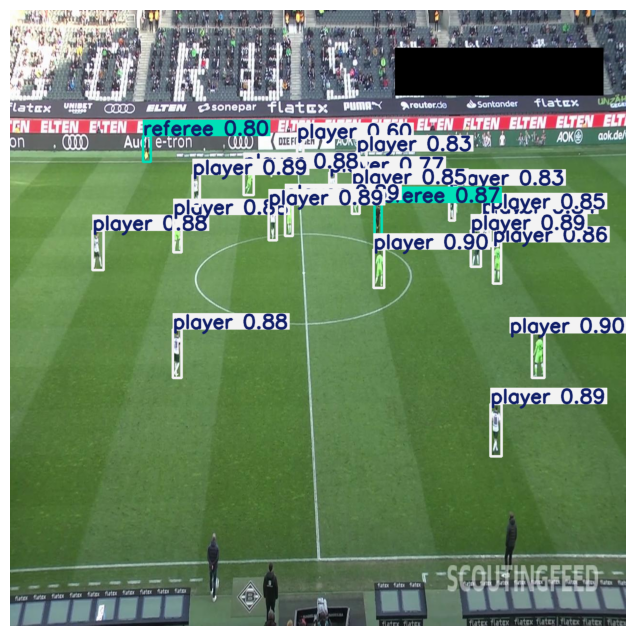

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO("/content/model_detect/runs/detect/train/weights/best.pt")

results = model.predict("/content/model_detect/football-players-detection-12/test/images/08fd33_3_6_png.rf.bee65249830b3e263ebe95a999f39e34.jpg")

res = results[0]

img_with_boxes = res.plot()  

img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


In [ ]:
import os
from ultralytics import YOLO
from inference import get_model

video_path = "/content/1034.mp4"
saved_path = "output_videos/output_video.mp4"
saved_map_path = "output_videos/output_map_video.mp4"
final_output_path = "output_videos/combined_output_video.mp4"

if "ROBOFLOW_API_KEY" not in os.environ:
    pass

os.makedirs("output_videos", exist_ok=True)

ROBOFLOW_API_KEY = userdata.get("ROBOFLOW_API_KEY")
PLAYER_MODEL_PATH = "/content/model_detect/runs/detect/train/weights/best.pt"
PLAYER_DETECTION_MODEL = YOLO(PLAYER_MODEL_PATH)

FIELD_MODEL_ID = "football-field-detection-f07vi-8n9pw/4"
FIELD_DETECTION_MODEL = get_model(model_id=FIELD_MODEL_ID, api_key=ROBOFLOW_API_KEY)

⚽ Load Player Model: /content/model_detect/runs/detect/train/weights/best.pt
🏟️ Load Field Model from Roboflow: football-field-detection-f07vi-8n9pw/4


[12/08/25 04:44:42] WARNING  Unsupported resize method 'Fit within', defaulting to 'Fit (black      ]8;id=652240;file:///usr/local/lib/python3.12/dist-packages/inference/core/models/roboflow.py\roboflow.py]8;;\:]8;id=671899;file:///usr/local/lib/python3.12/dist-packages/inference/core/models/roboflow.py#460\460]8;;\
                             edges) in' - this may result in degraded model performance.                           

In [17]:
tracker = Tracker(PLAYER_DETECTION_MODEL)

tracks = tracker.track(video_path)

Tracking: 382it [00:23, 16.21it/s]


In [19]:
output_video_frames = tracker.draw_annotations(frames=video_path, tracks=tracks)
save_video(output_video_frames, saved_path)
print(f"Đã lưu Video 1: {saved_path}")

map_2 = Map_2()
output_map = map_2.draw_minimap(
    frames=video_path,
    tracks=tracks,
    FIELD_DETECTION_MODEL=FIELD_DETECTION_MODEL
)
save_video(output_map, saved_map_path)
print(f"Đã lưu Video 2: {saved_map_path}")

from google.colab import files
if os.path.exists(saved_path): files.download(saved_path)
if os.path.exists(saved_map_path): files.download(saved_map_path)

Drawing: 382it [00:08, 46.66it/s]


Đã lưu Video 1: output_videos/output_video.mp4


Map Gen: 382it [02:16,  2.79it/s]


Đã lưu Video 2: output_videos/output_map_video.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>